# Setup

In [ ]:
%pip install pyshark
%pip install nest_asyncio
%pip install pandas
%pip install tabulate
%pip install matplotlib_venn

In [1]:
import pandas as pd
import nest_asyncio
nest_asyncio.apply()
run_seed=0

In [2]:
import sys
sys.path.append('..')
from src.visualization.visualization import Visualization
from src.preprocessors.pcap_preprocessor import PcapPreprocessor
from tabulate import tabulate

preprocessor = PcapPreprocessor()
visualization = Visualization()

In [3]:
base_data = preprocessor.get_all_data()

In [4]:
print(base_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190000 entries, 0 to 189999
Columns: 1505 entries, _id to dhcpv6.requested_option_code
dtypes: float64(808), object(697)
memory usage: 2.1+ GB
None


In [4]:
base_data = preprocessor.preprocess_dataframe(base_data)

# Visualization

In [5]:
res = preprocessor.get_database_information()
datasets_info = res['datasets']
labels_info = res['labels']

In [6]:
pd.DataFrame(datasets_info)

_id  count
0              data/pcap/normal/normal_2.pcap  50000
1              data/pcap/normal/normal_1.pcap  50000
2      data/pcap/anomaly/normal_backdoor.pcap  10000
3   data/pcap/anomaly/normal_runsomware1.pcap  10000
4         data/pcap/anomaly/MITM_normal1.pcap  10000
5    data/pcap/anomaly/injection_normal1.pcap  10000
6         data/pcap/anomaly/normal_DoS_1.pcap  10000
7          data/pcap/anomaly/normal_XSS1.pcap  10000
8     data/pcap/anomaly/normal_scanning1.pcap  10000
9     data/pcap/anomaly/password_normal1.pcap  10000
10       data/pcap/anomaly/normal_DDoS_1.pcap  10000

In [7]:
pd.DataFrame(labels_info)

_id   count
0   normal  100000
1  anomaly   90000

##### Get geral information

In [8]:
print(base_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190000 entries, 0 to 189999
Columns: 753 entries, _id to dhcpv6.duidllt_link_layer_addr
dtypes: bool(67), float64(286), object(400)
memory usage: 1006.6+ MB
None


##### Get Column information

In [9]:
visualization.column_info(base_data)

In [10]:
# Get the columns that are common in all datasets
common_columns = visualization.find_common_columns_from_datasets(base_data)
common_columns.sort()
print(common_columns)
len(common_columns)

['DATA.data', 'DATA.data_data', 'DATA.data_len', '_id', 'arp.dst_hw_mac', 'arp.dst_proto_ipv4', 'arp.opcode', 'arp.src_hw_mac', 'arp.src_proto_ipv4', 'browser.server_type_dfs', 'browser.server_type_domainenum', 'browser.server_type_master', 'browser.server_type_nts', 'browser.server_type_potential', 'browser.server_type_print', 'browser.server_type_server', 'browser.server_type_workstation', 'browser.server_type_xenix', 'dns.a', 'dns.count_add_rr', 'dns.count_answers', 'dns.count_auth_rr', 'dns.count_labels', 'dns.dnskey_flags_secure_entry_point', 'dns.flags', 'dns.flags_authenticated', 'dns.flags_authoritative', 'dns.flags_checkdisable', 'dns.flags_rcode', 'dns.flags_recavail', 'dns.flags_recdesired', 'dns.flags_response', 'dns.flags_truncated', 'dns.id', 'dns.nsec3_flags', 'dns.nsec3_flags_opt_out', 'dns.qry_name', 'dns.qry_name_len', 'dns.qry_type', 'dns.resp_len', 'dns.resp_name', 'dns.resp_ttl', 'dns.resp_type', 'dns.resp_z_do', 'dns.response_to', 'dns.time', 'eth.dst_ig', 'eth.ds

190

In [11]:
visualization.get_non_null_values_column_x(base_data, 'xml.xmlpi_xml')

2488                        <?xml version="1.0"?>
2502                        <?xml version="1.0"?>
2562       <?xml version="1.0" encoding="utf-8"?>
2571                        <?xml version="1.0"?>
2602       <?xml version="1.0" encoding="utf-8"?>
                           ...                   
115826     <?xml version="1.0" encoding="utf-8"?>
115859    <?xml version="1.0" encoding="utf-8" ?>
119015     <?xml version="1.0" encoding="utf-8"?>
119022                      <?xml version="1.0"?>
119053    <?xml version="1.0" encoding="utf-8" ?>
Name: xml.xmlpi_xml, Length: 407, dtype: object

In [12]:
visualization.get_unique_values_column_x(base_data, 'xml.xmlpi_xml')

array(['<?xml version="1.0"?>', '<?xml version="1.0" encoding="utf-8"?>',
       '<?xml version="1.0" encoding="utf-8" ?>',
       '<?xml version="1.0" encoding="UTF-8"?>'], dtype=object)

In [13]:
single_value_features = visualization.get_single_value_features(base_data)
print(single_value_features)
print(len(single_value_features))

[]
0


In [14]:
double_value_features = visualization.get_double_value_features(base_data)
print(double_value_features)
print(len(double_value_features))

['label', 'sll.hatype', 'eth.dst_lg', 'eth.lg', 'eth.dst_ig', 'eth.ig', 'ip.version', 'ip.hdr_len', 'ip.dsfield_ecn', 'ip.flags_df', 'ip.flags_mf', 'tcp.flags_cwr', 'tcp.flags_ece', 'tcp.flags_urg', 'tcp.flags_ack', 'tcp.flags_push', 'tcp.flags_reset', 'tcp.flags_syn', 'tcp.flags_fin', 'tcp.option_kind', 'tcp.', 'mqtt.hdrflags', 'mqtt.msgtype', 'icmp.code', 'icmp.data', 'icmp.data_data', 'icmp.data_len', 'sll.trailer', 'arp.opcode', 'rpcap.type', 'tcp._ws_expert_group', 'ipv6.src_slaac_mac', 'ipv6.slaac_mac', 'ipv6.dst_slaac_mac', 'icmpv6.reserved', 'icmpv6.opt_type', 'icmpv6.nd_na_flag_r', 'icmpv6.nd_na_flag_s', 'icmpv6.nd_na_flag_o', 'tls.app_data_proto', 'ip._ws_expert', 'ip._ws_expert_message', 'ip._ws_expert_severity', 'ip._ws_expert_group', 'smb.error_class', 'smb.reserved', 'smb.error_code', 'smb.flags_response', 'smb.flags_canon', 'smb.flags_caseless', 'smb.flags2_string', 'smb.flags2_nt_error', 'smb.flags2_roe', 'smb.flags2_esn', 'smb.flags2_sec_sig', 'smb.flags2_ea', 'smb.fla

##### Get n first rows

In [15]:
visualization.first_x_rows(base_data, 5)

In [16]:
base_data.head()

_id                         dataset   label  \
0  673b0fd0408f75aba523b7fd  data/pcap/normal/normal_2.pcap  normal   
1  673b0fd0408f75aba523b7fe  data/pcap/normal/normal_2.pcap  normal   
2  673b0fd0408f75aba523b7ff  data/pcap/normal/normal_2.pcap  normal   
3  673b0fd0408f75aba523b800  data/pcap/normal/normal_2.pcap  normal   
4  673b0fd0408f75aba523b801  data/pcap/normal/normal_2.pcap  normal   

      timestamp size frame_number  sll.pkttype  sll.hatype        sll.src_eth  \
0  1.554230e+09  501            1          4.0         1.0  a4:91:b1:1e:58:a0   
1  1.554230e+09  502            2          4.0         1.0  a4:91:b1:1e:58:a1   
2  1.554230e+09  503            3          4.0         1.0  a4:91:b1:1e:58:a2   
3  1.554230e+09  504            4          4.0         1.0  a4:91:b1:1e:58:a3   
4  1.554230e+09  505            5          4.0         1.0  a4:91:b1:1e:58:a4   

  sll.unused  ... ftp.response_arg ftp.request_command  ftp.request_arg  \
0      26:27  ...              NaN                 NaN              NaN   
1      76:77  ...              NaN                 NaN              NaN   
2      de:df  ...              NaN                 NaN              NaN   
3      2e:2f  ...              NaN                 NaN              NaN   
4      8e:8f  ...              NaN                 NaN              NaN   

  icmpv6.opt_prefix_valid_lifetime icmpv6.opt_prefix_preferred_lifetime  \
0                              NaN                                  NaN   
1                              NaN                                  NaN   
2                              NaN                                  NaN   
3                              NaN                                  NaN   
4                              NaN                                  NaN   

   icmpv6.opt_route_lifetime  dhcpv6.xid  dhcpv6.duid_bytes  \
0                        NaN         NaN                NaN   
1                        NaN         NaN                NaN   
2                        NaN         NaN                NaN   
3                        NaN         NaN                NaN   
4                        NaN         NaN                NaN   

   dhcpv6.duidllt_time  dhcpv6.duidllt_link_layer_addr  
0                  NaN                             NaN  
1                  NaN                             NaN  
2                  NaN                             NaN  
3                  NaN                             NaN  
4                  NaN                             NaN  

[5 rows x 753 columns]

##### Distribution of the datasets

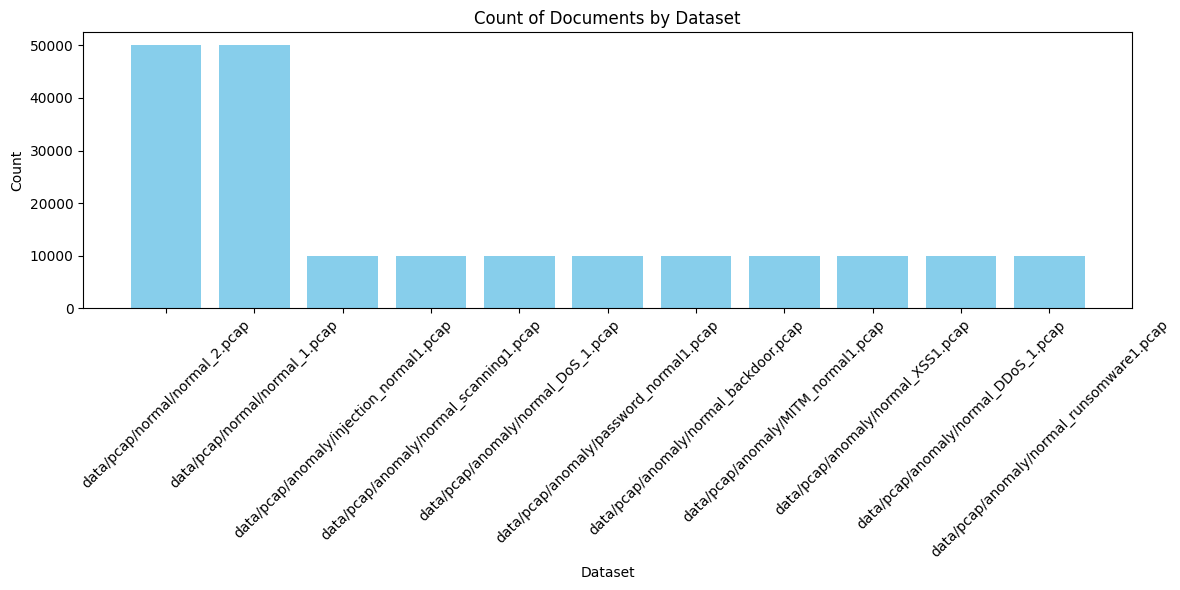

In [17]:
visualization.plot_dataset_counts(base_data)

##### Distribution of classification

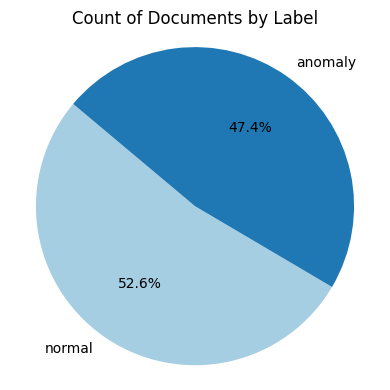

In [18]:
visualization.plot_label_counts(base_data)

##### Correlation Matrix

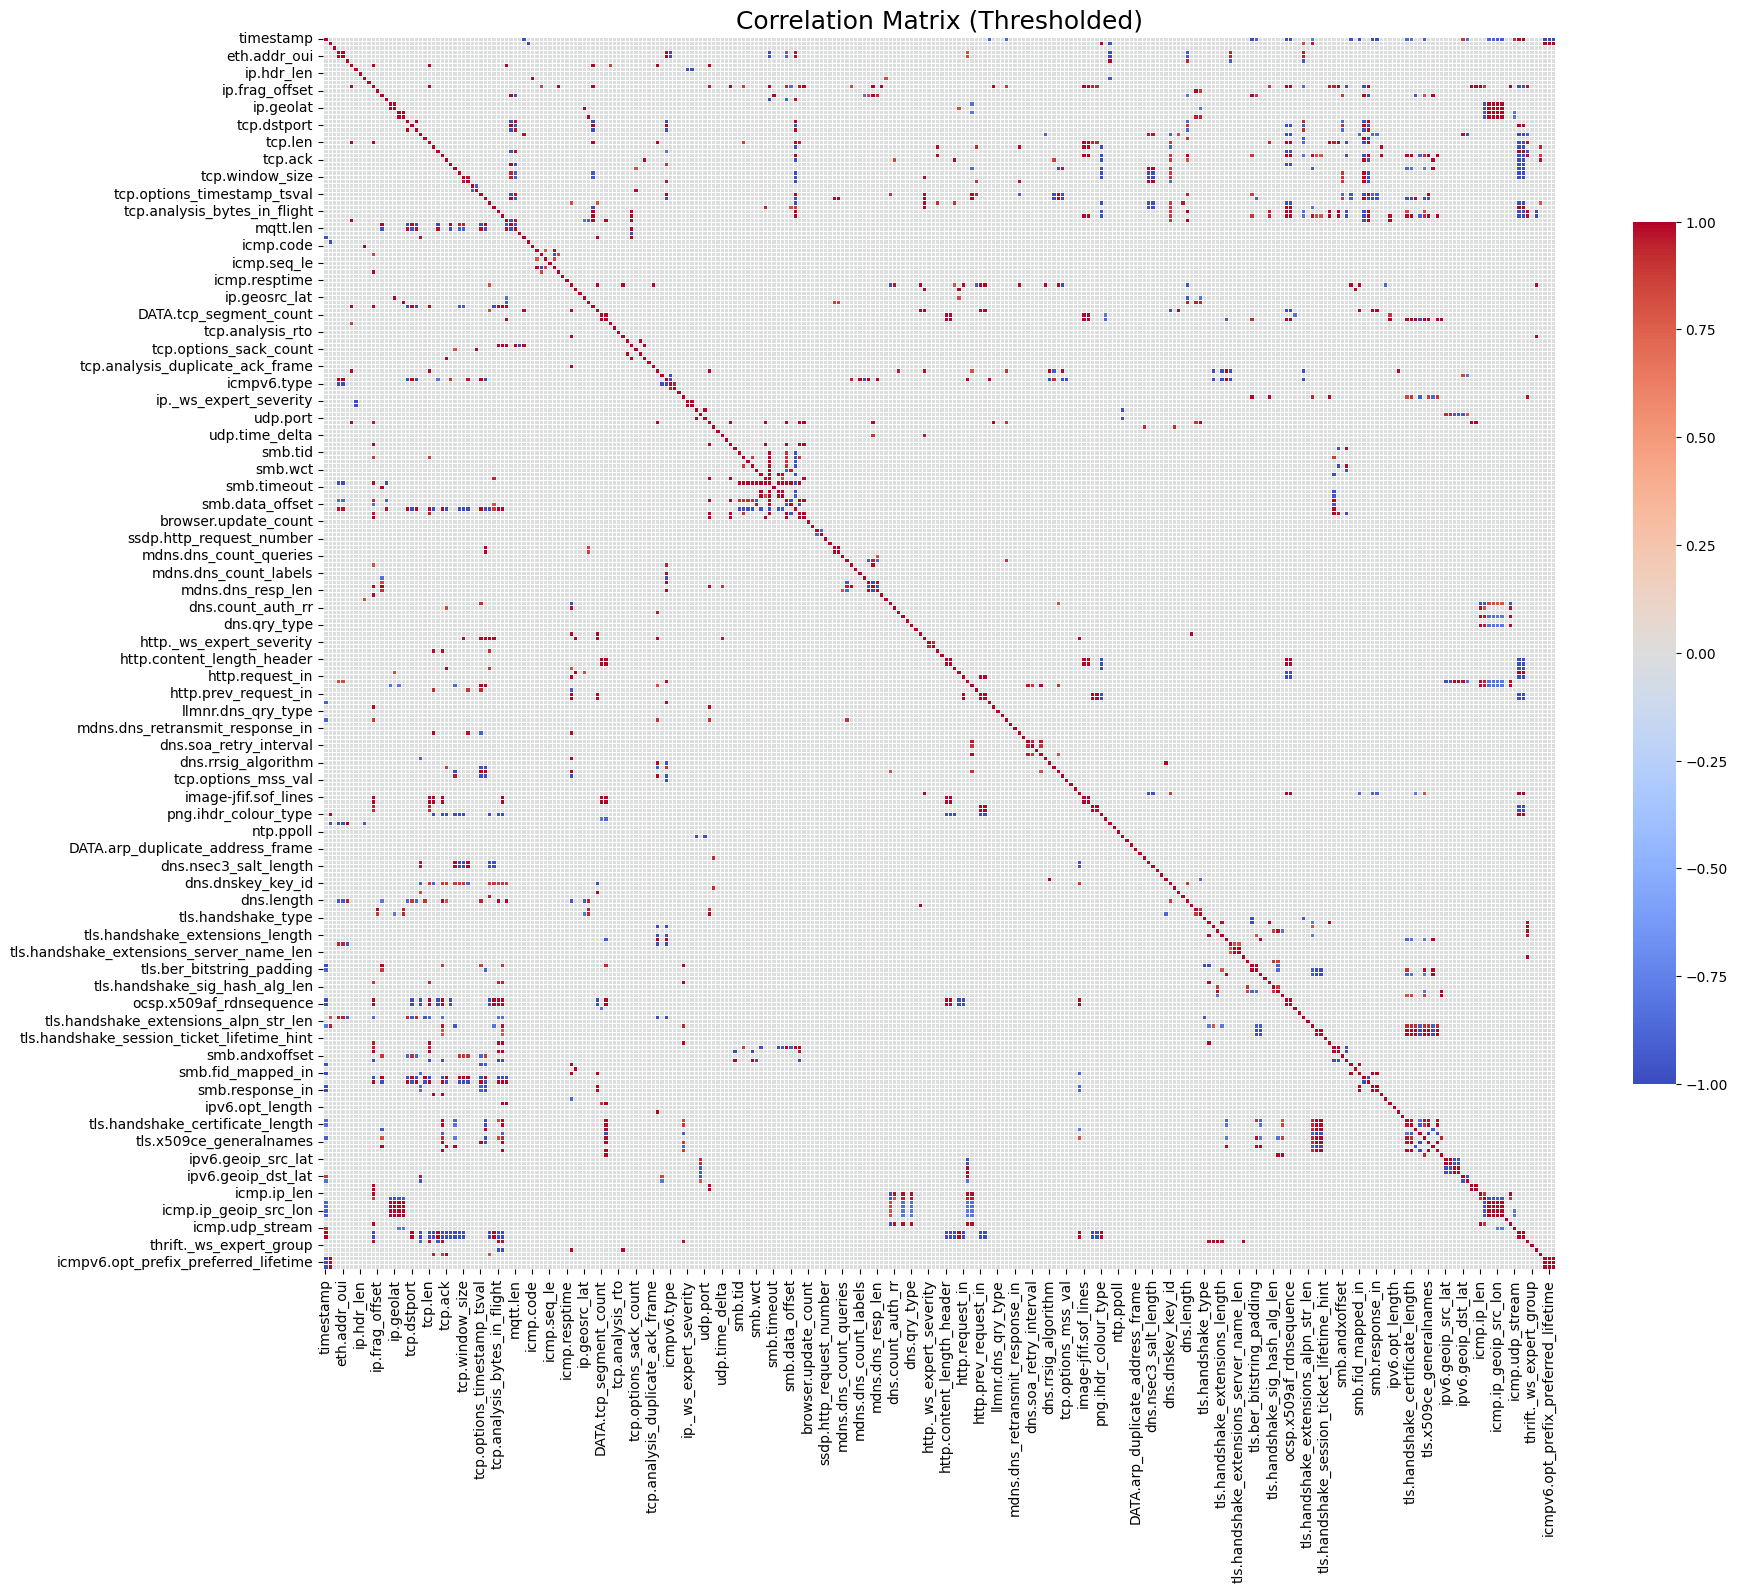

In [19]:
high_correlation = visualization.plot_correlation_matrix(base_data, corr_threshold=0.8)
print(high_correlation if high_correlation is not None else "")

##### Distribution of different features

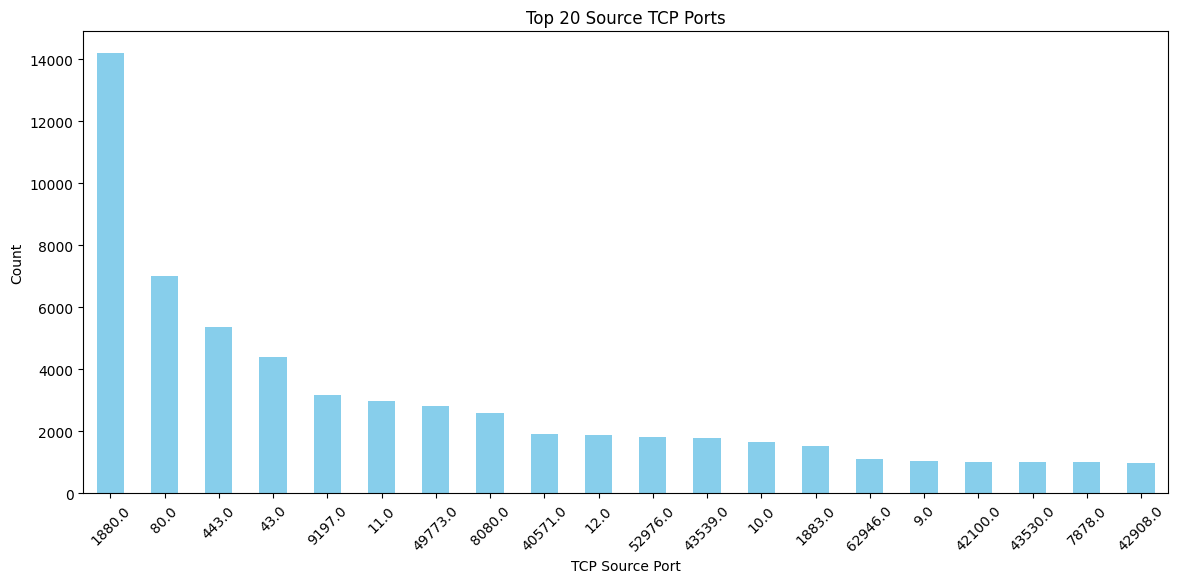

In [20]:
visualization.plot_tcp_source_ports(base_data)

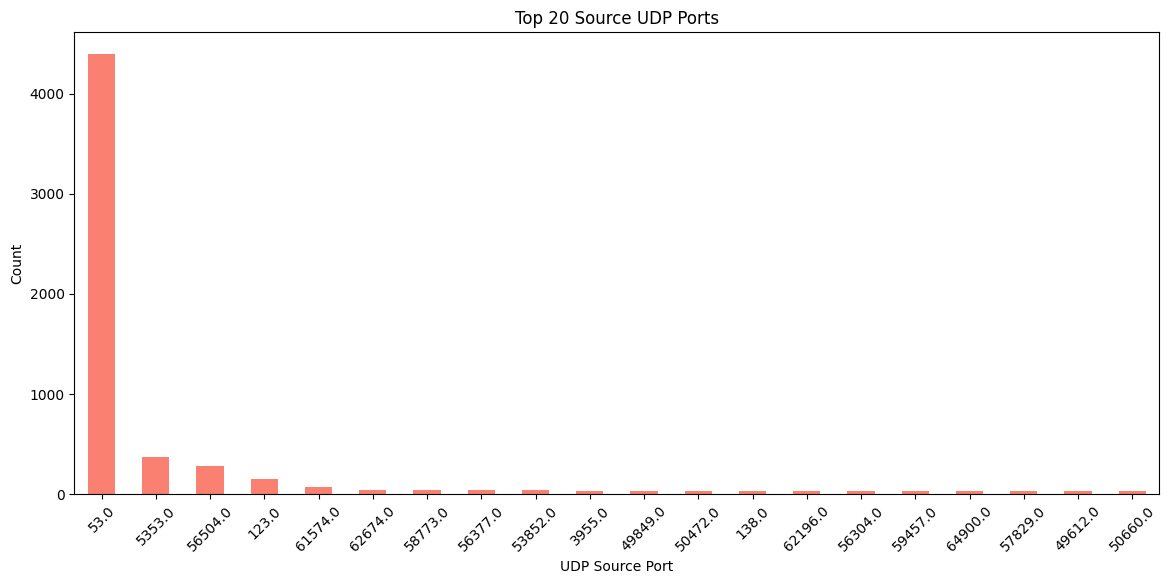

In [21]:
visualization.plot_udp_source_ports(base_data)

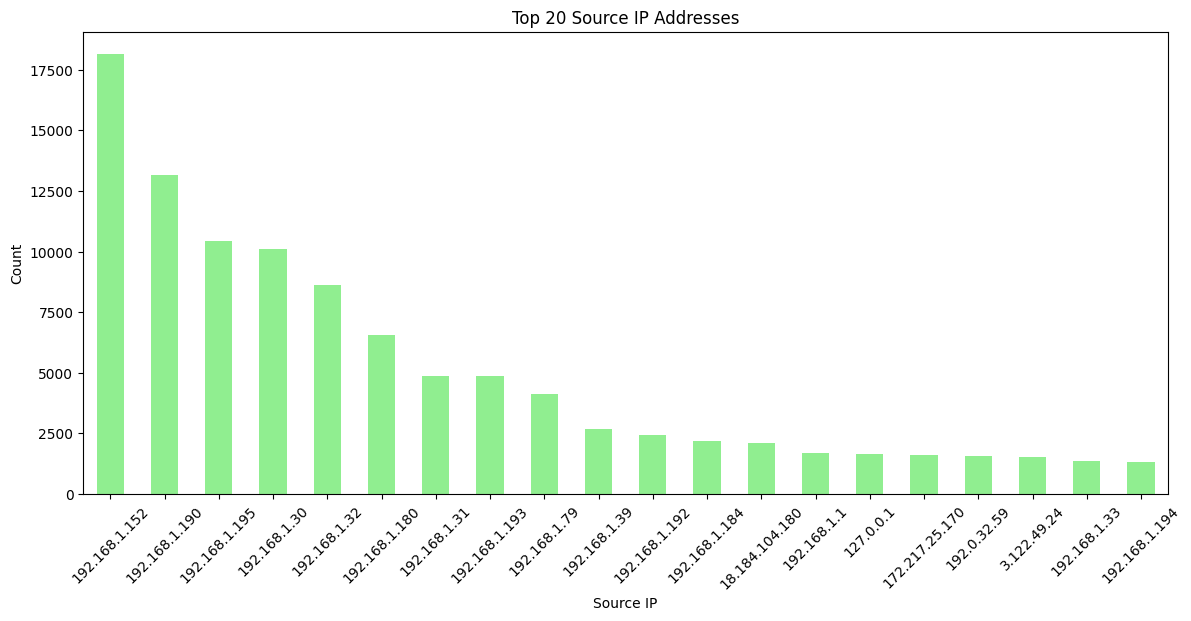

In [22]:
visualization.plot_top_ip_addresses(base_data)

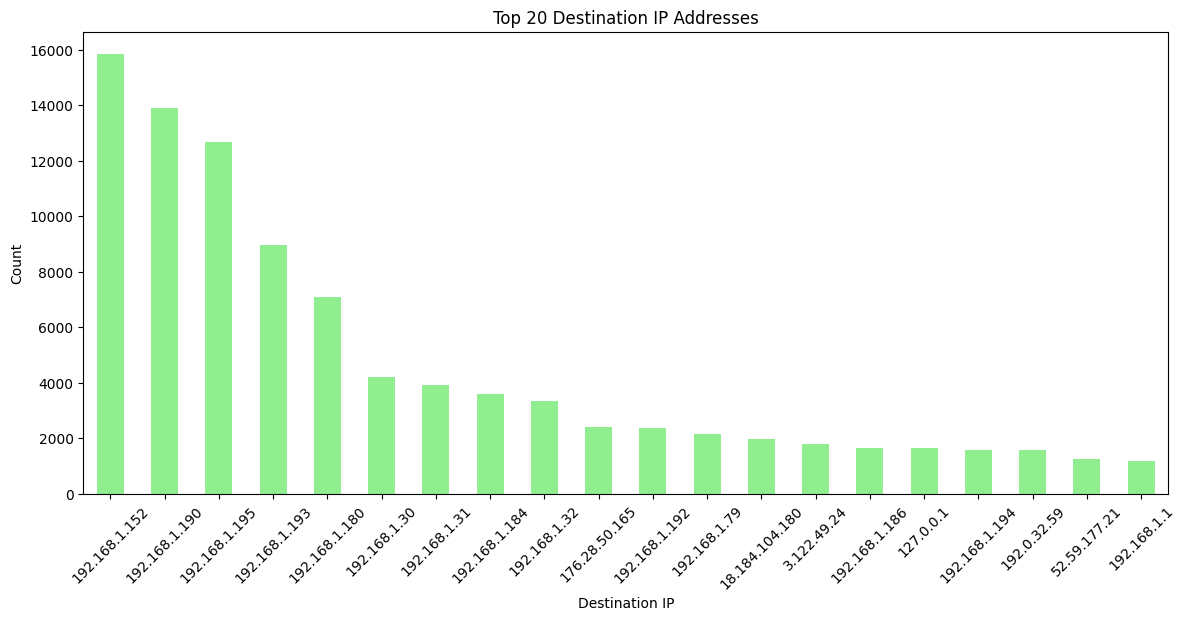

In [23]:
visualization.plot_top_ip_dest_addresses(base_data)

/home/ritavaz02/Documents/uni/5ano/pi-2425/notebooks/../src/visualization/visualization.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='tcp.flags_str', data=base_data, order=base_data['tcp.flags_str'].value_counts().index, palette='coolwarm')


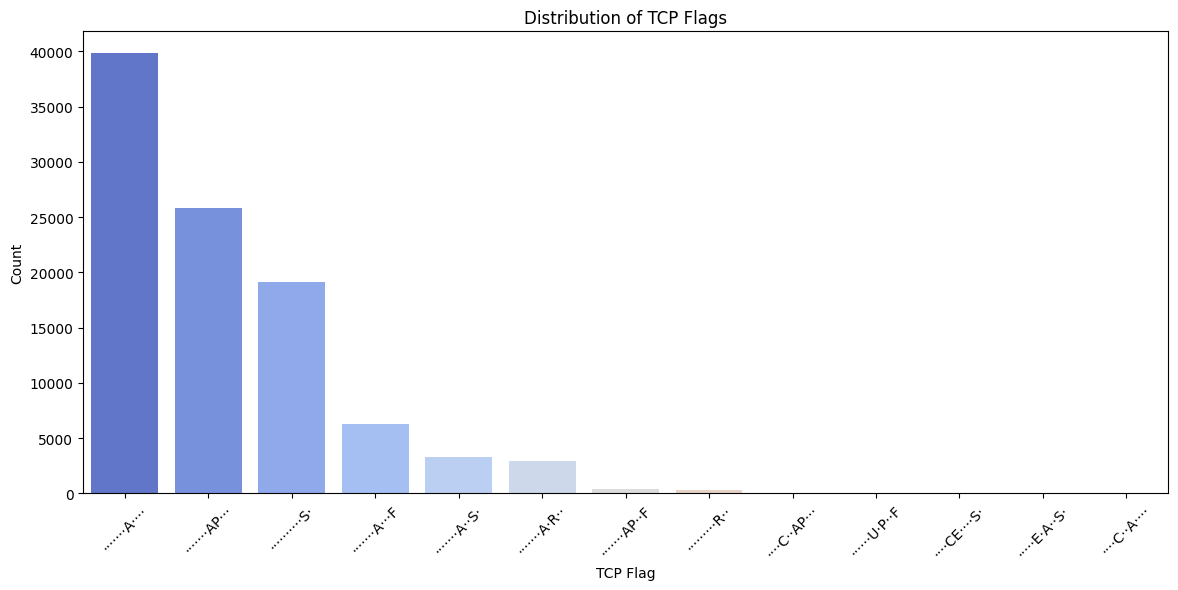

In [24]:
visualization.plot_tcp_flags_distribution(base_data)

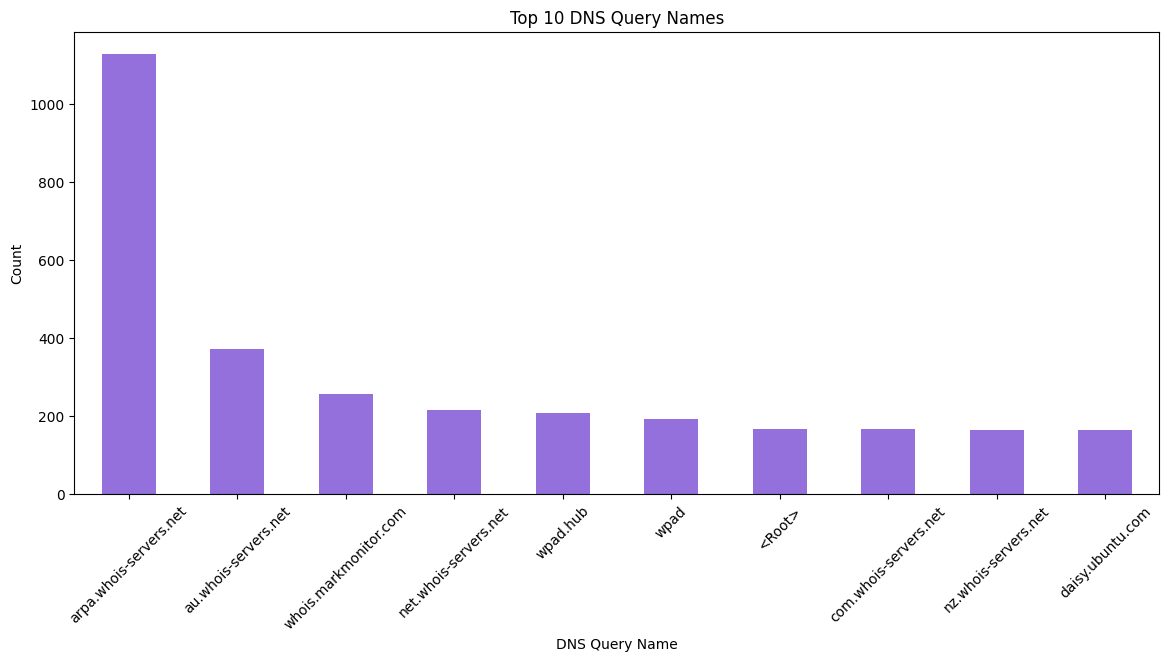

In [25]:
visualization.plot_dns_queries(base_data)

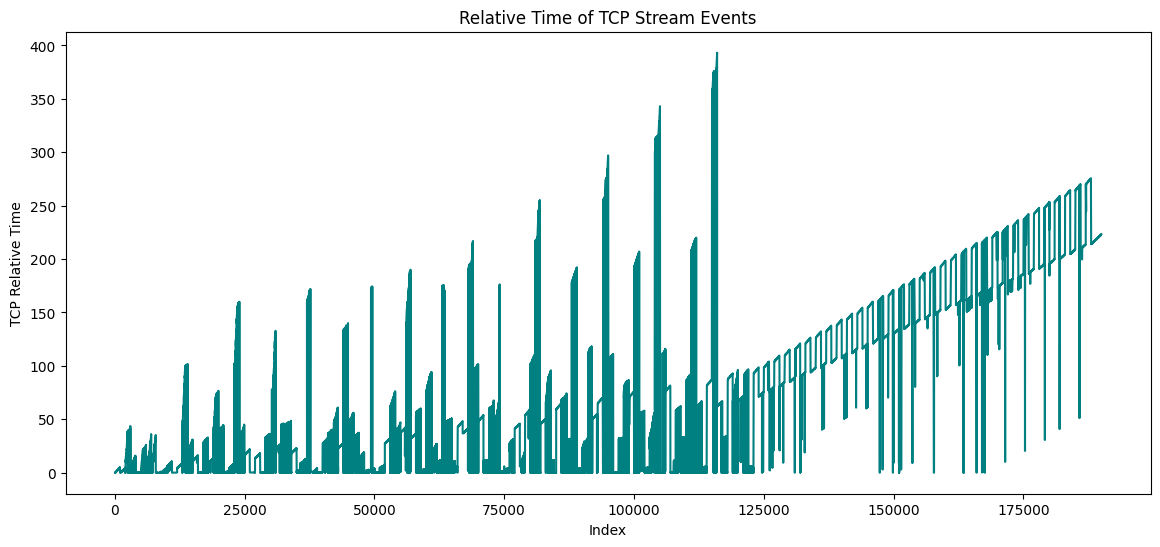

In [26]:
visualization.plot_tcp_stream_time_series(base_data)

In [ ]:
# See distribution of the all columns
# visualization.plot_distribution(bd_data)

##### Clean the data - missing values

In [27]:
base_data_cleaned = visualization.filter_columns_by_missing_values(base_data, 1)

Columns with 0% Missing Values: ['_id', 'dataset', 'label', 'timestamp', 'size', 'frame_number', 'eth.dst_lg', 'eth.lg', 'eth.dst_ig', 'eth.ig', 'ip.flags_df', 'ip.flags_mf', 'tcp.flags_cwr', 'tcp.flags_ece', 'tcp.flags_urg', 'tcp.flags_ack', 'tcp.flags_push', 'tcp.flags_reset', 'tcp.flags_syn', 'tcp.flags_fin', 'icmpv6.nd_na_flag_r', 'icmpv6.nd_na_flag_s', 'icmpv6.nd_na_flag_o', 'smb.flags_response', 'smb.flags_canon', 'smb.flags_caseless', 'smb.flags2_string', 'smb.flags2_nt_error', 'smb.flags2_roe', 'smb.flags2_esn', 'smb.flags2_sec_sig', 'smb.flags2_ea', 'smb.flags2_long_names_allowed', 'smb.msc', 'mailslot.priority', 'browser.server_type_workstation', 'browser.server_type_server', 'browser.server_type_print', 'browser.server_type_xenix', 'browser.server_type_nts', 'browser.server_type_potential', 'browser.server_type_master', 'browser.server_type_dfs', 'browser.server_type_domainenum', 'mdns.dns_flags_response', 'mdns.dns_qry_qu', 'mdns.dns_resp_cache_flush', 'dns.flags_response',

In [28]:
visualization.print_non_null_values_high_missing(base_data, 0.99)

Unique non-null values in 'mqtt.topic_len': [24.0, 23.0, 25.0, 21.0, 12.0, 17.0]
Unique non-null values in 'mqtt.topic': ['/smarfactory/Modbus-data', '/smarthome/motionLights', '/smarthome/weatherStation', '/smarthome/thermostat', '/smarthome/garageDoor', '/iot/locator', '/smarthome/fridge']
Unique non-null values in 'mqtt.msg': ['7b:22:64:61:74:61:22:3a:5b:32:33:35:30:36:2c:33:38:35:33:32:2c:33:32:37:33:36:2c:35:30:30:35:5d:2c:22:62:75:66:66:65:72:22:3a:7b:22:74:79:70:65:22:3a:22:42:75:66:66:65:72:22:2c:22:64:61:74:61:22:3a:5b:39:31:2c:32:31:30:2c:31:35:30:2c:31:33:32:2c:31:32:37:2c:32:32:34:2c:31:39:2c:31:34:31:5d:7d:7d', '7b:22:69:64:22:3a:34:2c:22:74:69:6d:65:73:74:61:6d:70:22:3a:22:54:75:65:2c:20:30:32:20:41:70:72:20:32:30:31:39:20:31:38:3a:33:35:3a:32:37:20:47:4d:54:22:2c:22:4d:6f:74:69:6f:6e:20:44:65:74:65:63:74:65:64:22:3a:74:72:75:65:2c:22:4c:69:67:68:74:73:20:43:6f:6e:64:69:74:69:6f:6e:22:3a:74:72:75:65:2c:22:6d:65:73:73:61:67:65:22:3a:22:4c:69:67:68:74:73:20:6f:6e:2e:22:7d',

In [ ]:
visualization.plot_missing_values_heatmap(base_data_cleaned)

In [ ]:
threshold = 0.50

missing_percentage = visualization.calculate_missing_percentages(base_data)

# Print columns with 0% missing values
visualization.print_zero_missing_columns(missing_percentage)

# Print columns with missing values above the threshold
visualization.print_high_missing_columns(missing_percentage, threshold)

# Print table of columns with valid missing values (less than threshold)
visualization.print_valid_columns_table(missing_percentage, threshold)


In [ ]:
visualization.get_types(base_data)

verificar se as entradas dos graficos acima pertencem  aos pacotes de trafego para perceber s n ha cenas que passaram infiltradas

thrift -> protocol
urlencoded-form -> htlm form url encoded: application/x-www-form-urlencoded
dcerpc -> protocol
nbns -> protocol
igmp -> protocol
ftp -> protocol
DATA -> conteúdo
image-jfif -> JPEG File Interchange Format
png -> Portable Network Graphics
llmnr -> Link-local Multicast Name Resolution (query)
smb -> server message block protocol
ip -> protocol
mdns -> multicast domain name system
xml -> language
tls -> transport layer security
whois -> query
ssdp -> simple service discovery protocol
data-text-lines -> line-based text data: text/plain
http -> protocol
dns -> protocol
udp -> protocol
tcp -> protocol


layer -> todos os que têm esta coluna true são para aparecer neste gráfico 




In [ ]:
visualization.check_udp_port_columns(base_data)
visualization.check_tcp_port_columns(base_data)